# Time-Domain Specification Example

## Python Control System Toolbox
If you are running this code at your local computer where the python control system toolbox is already installed skip or uncomment the following line.

In [ ]:
pip install control

## Time-Domain Specification

Consider a second-order system with $\omega_n=1$ and $\zeta=0.3$

1. Time domain specification can be found from the step response

<IPython.core.display.Javascript object>


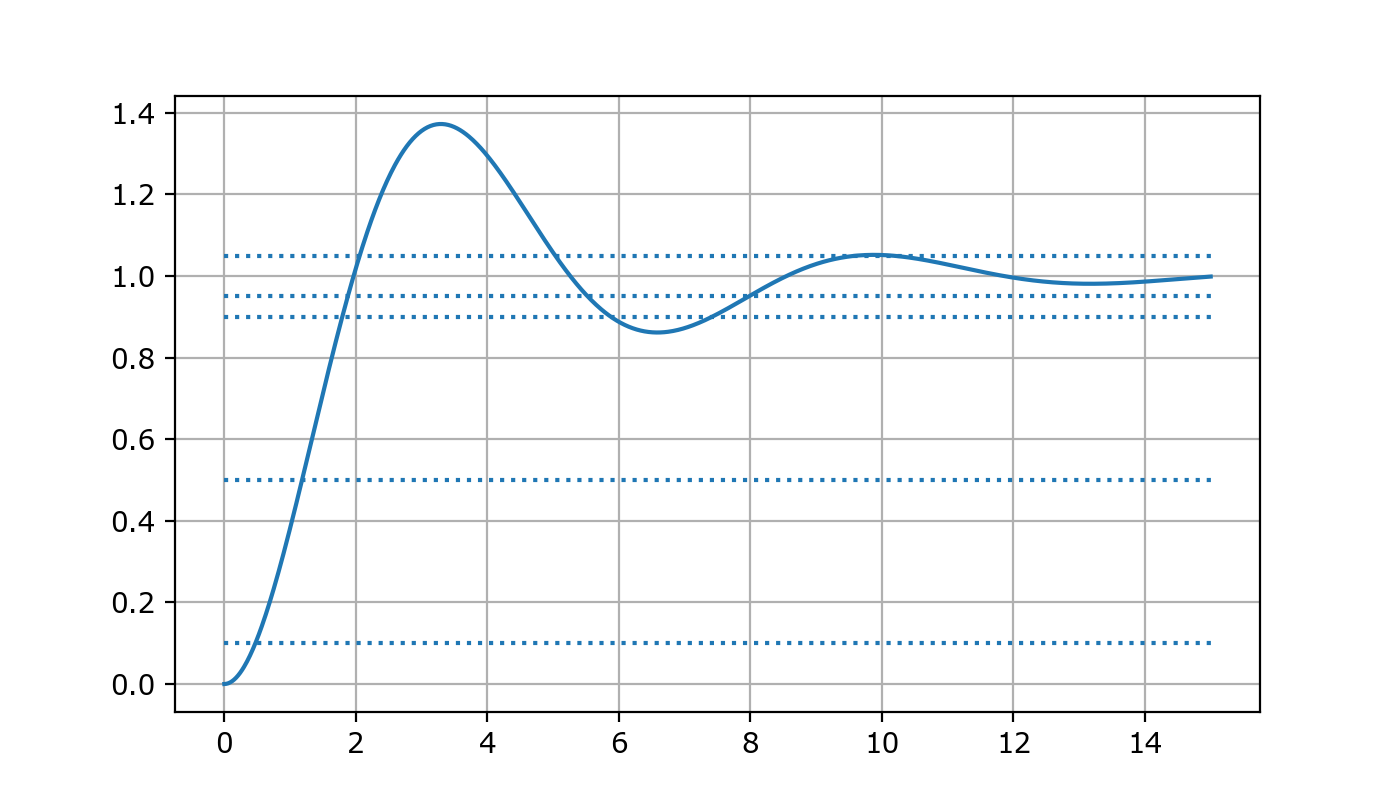

In [1]:
import control 
import matplotlib.pyplot as plt
import numpy as np

wn = 1
zeta = 0.3
sysG = control.tf(wn**2, [1, 2*zeta*wn, wn**2])

%matplotlib notebook
T = 15
plt.figure(figsize=(7,4))
t = np.linspace(0,T,1001)
t, y = control.step_response(sysG,t)


plt.plot(t,y)
plt.hlines(0.95, 0, T, linestyles='dotted')
plt.hlines(1.05, 0, T, linestyles='dotted')
plt.hlines(0.5, 0, T, linestyles='dotted')
plt.hlines(0.1, 0, T, linestyles='dotted')
plt.hlines(0.9, 0, T, linestyles='dotted')
plt.grid()


2. Or, we can use the approximate formula developed for the second order system

In [2]:
# Approx formula
M_p = np.exp(-np.pi*zeta/np.sqrt(1-zeta**2))
t_d = (1+0.7*zeta)/wn
t_r = (0.8+2.5*zeta)/wn
t_s = 3.2/zeta/wn
print(f'M_p = {M_p:.2f}')
print(f't_d = {t_d}')
print(f't_r = {t_r}')
print(f't_s = {t_s:.2f}')

M_p = 0.37
t_d = 1.21
t_r = 1.55
t_s = 10.67


3. Alternatively, those can be computed by the commnad `step_info`

In [3]:
help(control.step_info)

Help on function step_info in module control.timeresp:

step_info(sysdata, T=None, T_num=None, yfinal=None, SettlingTimeThreshold=0.02, RiseTimeLimits=(0.1, 0.9))
    Step response characteristics (Rise time, Settling Time, Peak and others).
    
    Parameters
    ----------
    sysdata : StateSpace or TransferFunction or array_like
        The system data. Either LTI system to similate (StateSpace,
        TransferFunction), or a time series of step response data.
    T : array_like or float, optional
        Time vector, or simulation time duration if a number (time vector is
        autocomputed if not given, see :func:`step_response` for more detail).
        Required, if sysdata is a time series of response data.
    T_num : int, optional
        Number of time steps to use in simulation if T is not provided as an
        array; autocomputed if not given; ignored if sysdata is a
        discrete-time system or a time series or response data.
    yfinal : scalar or array_like, opt

Using this, the rise time, the overshoot and the 10\% settling time can be computed by

In [2]:
output = control.step_info(sysG, SettlingTimeThreshold = 0.05)
t_r = output["RiseTime"]
M_p = output["Overshoot"]/100
t_s = output["SettlingTime"]
print(f'M_p = {M_p:.2f}')
print(f't_r = {t_r:.2f}')
print(f't_s = {t_s:.2f}')

M_p = 0.37
t_r = 1.16
t_s = 10.23


The delay time can be computed by adjusting the bound of the rise time

In [3]:
output = control.step_info(sysG, RiseTimeLimits = (0,0.5))
t_d = output["RiseTime"]
print(f't_d = {t_d}')

t_d = 1.3955061169660883


Finally, we can formulate our own version of `mae4182.step_info` function as follows.

In [5]:
import control
import matplotlib.pyplot as plt
import numpy as np
import sys
import types

mae4182 = types.ModuleType('mae4182')
sys.modules['mae4182'] = mae4182

mae4182_code = '''
import control
import matplotlib.pyplot as plt
import numpy as np

import sys
import types


def step_info(sysG):
    output = control.step_info(sysG, SettlingTimeThreshold = 0.05)
    M_p = output["Overshoot"]
    t_r = output["RiseTime"]
    t_s = output["SettlingTime"]
    output = control.step_info(sysG, RiseTimeLimits = (0,0.5))
    t_d = output["RiseTime"]
    return M_p, t_r, t_s, t_d

'''
exec(mae4182_code, mae4182.__dict__)




In [6]:
mae4182.step_info(sysG)

(37.20679440586314, 1.162921764138407, 10.23371152441798, 1.3955061169660883)